In [57]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Installing pydicom

!pip install pydicom

In [59]:
#installing the libraries:

import pandas as pd
import numpy as np
import pydicom
from glob import glob
import glob2
from tqdm import tqdm
import shutil
import os
import pydicom
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import warnings
from joblib import Parallel, delayed
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
import tensorflow as tf
import keras
# tf.enable_eager_execution()
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# from hilbert import hilbertCurve
import imgaug.augmenters as iaa
import numpy as np
import random as rn
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, Callback

In [61]:
import os

# import efficientnet.tfkeras as efn
import numpy as np
import pandas as pd
#from kaggle_datasets import KaggleDatasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
# import tensorflow.keras.applications.efficientnet as efn


import tensorflow as tf
from tensorflow.keras import Sequential
from keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, AveragePooling2D

In [ ]:
#https://www.kaggle.com/danofer/ranzcr-chexnet-starter/notebook

In [62]:
%cd /content/drive/MyDrive/Self \Case \Study \2/DATASET/ 

/content/drive/MyDrive/Self Case Study 2/DATASET


In [63]:
final_train_df = pd.read_csv('Train Dataset/siim/final_train_data.csv')
final_train_df.head(2)

,ImageId,EncodedPixels,ImagePath,MaskPath,ImagePath_Png
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....


In [64]:
imagePath = 'Train Dataset/siim/train_png_images/'
maskPath = 'Train Dataset/siim/train_mask_png_images/'

In [65]:
final_train_df['Target'] = final_train_df[' EncodedPixels'].apply(lambda x : 0 if x == '-1' else 1)

In [66]:
final_train_df.head(2)

,ImageId,EncodedPixels,ImagePath,MaskPath,ImagePath_Png,Target
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....,0
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...,Train Dataset/siim/train_dicom_images/1.2.276....,Train Dataset/siim/train_mask_png_images/1.2.2...,Train Dataset/siim/train_png_images/1.2.276.0....,1


In [67]:
imagePath = final_train_df['ImagePath_Png']
#targetLabels = final_train_df['Target'].values

In [12]:
imagePath

0        Train Dataset/siim/train_png_images/1.2.276.0....
1        Train Dataset/siim/train_png_images/1.2.276.0....
2        Train Dataset/siim/train_png_images/1.2.276.0....
3        Train Dataset/siim/train_png_images/1.2.276.0....
4        Train Dataset/siim/train_png_images/1.2.276.0....
                               ...                        
12042    Train Dataset/siim/train_png_images/1.2.276.0....
12043    Train Dataset/siim/train_png_images/1.2.276.0....
12044    Train Dataset/siim/train_png_images/1.2.276.0....
12045    Train Dataset/siim/train_png_images/1.2.276.0....
12046    Train Dataset/siim/train_png_images/1.2.276.0....
Name: ImagePath_Png, Length: 12047, dtype: object

In [13]:
load_dir = os.getcwd()
print(load_dir)

/content/drive/My Drive/Self Case Study 2/DATASET


In [68]:
#label_cols = final_train_df.columns[5:]
labels = final_train_df["Target"]

In [15]:
labels

0        0
1        1
2        0
3        1
4        1
        ..
12042    0
12043    1
12044    1
12045    0
12046    0
Name: Target, Length: 12047, dtype: int64

In [17]:
labels.shape

(12047,)

In [ ]:
targetLabels

array(['-1', '1', '-1', ..., '1', '-1', '-1'], dtype=object)

In [ ]:
targetLabels.shape[0]

12047

In [69]:
trainPath, validPath, trainLabels, validLabels = train_test_split(imagePath, labels, test_size = 0.1, random_state = 27, stratify=labels)

In [70]:
print('Total Train Dataset Size : ', trainPath.shape[0])
print('Total Valid Dataset Size : ', validPath.shape[0])

Total Train Dataset Size :  10842
Total Valid Dataset Size :  1205


In [18]:
trainLabels

5943     0
1455     0
1631     0
10874    0
727      0
        ..
2574     1
4568     0
9675     0
10061    0
335      0
Name: Target, Length: 10842, dtype: int64

In [71]:
trainCount=trainLabels.value_counts()
validCount = validLabels.value_counts()

In [72]:
totalTrainCount = trainLabels.shape[0]
totalPosCount = trainCount[1]
totalNegCount = trainCount[0]

print('Total Train Labels : ', totalTrainCount)
print('Total Train Positive Labels : ', totalPosCount)
print('Total Train Negative Labels : ', totalNegCount)

Total Train Labels :  10842
Total Train Positive Labels :  2402
Total Train Negative Labels :  8440


In [73]:
posFreq = round((totalPosCount/totalTrainCount),2)
negFreq = round((totalNegCount/totalTrainCount),2)

print('Frequency Of Positive Class : ', posFreq)
print('Frequency Of Negataive Class : ', negFreq)

Frequency Of Positive Class :  0.22
Frequency Of Negataive Class :  0.78


In [74]:
pos_weights = negFreq
neg_weights = posFreq

In [25]:
type(pos_weights)

numpy.float64

In [ ]:
pos_contribution = posFreq * pos_weights
neg_contribution = negFreq * neg_weights

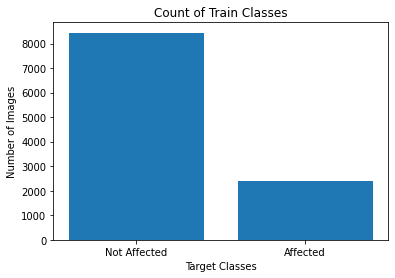

In [ ]:

classes = ['Not Affected', 'Affected']
count = [totalNegCount,totalPosCount]
plt.bar(classes,count)
plt.xlabel('Target Classes')
plt.ylabel('Number of Images')
plt.title('Count of Train Classes')
plt.show()

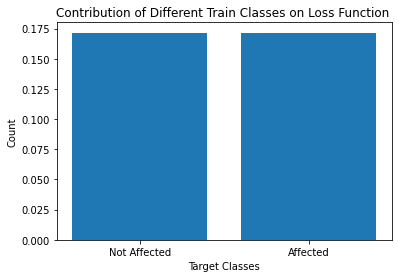

In [ ]:
classes = ['Not Affected', 'Affected']
count = [neg_contribution,pos_contribution]
plt.bar(classes,count)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Contribution of Different Train Classes on Loss Function ')
plt.show()

In [75]:
import random

In [76]:
#https://www.kaggle.com/danofer/ranzcr-chexnet-starter/output?select=submission.csv
#https://www.tensorflow.org/tutorials/images/data_augmentation

def build_decoder(with_labels=True, target_size=(300, 300)):
    def decode(path):
        file_bytes = tf.io.read_file(path)
        img = tf.image.decode_png(file_bytes, channels=3)
        img = tf.cast(img, tf.float32) / 255.0
        img = tf.image.resize(img, target_size)

        return img
    
    def decode_with_labels(path, label):
        return decode(path), label
    
    return decode_with_labels if with_labels else decode

def build_augmenter(with_labels=True):
    def augment(img):
        number = random.randint(1,5)
        seed = (1, 5)
        if number == 1:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_contrast(img,0.2, 0.5,seed)
        if number == 2:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_brightness(img, 0.2,seed)
        if number == 3:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_saturation(img, 0.2, 0.5,seed)
        if number == 4:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_hue(img, 0.2,seed)
        if number == 5:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.adjust_gamma(img, 0.2)
        return img
    
    def augment_with_labels(img, label):
        return augment(img), label
    
    return augment_with_labels if with_labels else augment

def build_dataset(paths, labels=None, bsize=32, cache=True,
                  decode_fn=None, augment_fn=None,
                  augment=True, repeat=True, shuffle=1024,cache_dir=""):
    if cache_dir != "" and cache is True:
        os.makedirs(cache_dir, exist_ok=True)

    if decode_fn is None:
        decode_fn = build_decoder(labels is not None)
    
    if augment_fn is None:
        augment_fn = build_augmenter(labels is not None)
    
    AUTO = tf.data.experimental.AUTOTUNE
    slices = paths if labels is None else (paths, labels)
    
    dset = tf.data.Dataset.from_tensor_slices(slices)
    dset = dset.map(decode_fn, num_parallel_calls=AUTO)
    dset = dset.cache(cache_dir) if cache else dset
    dset = dset.map(augment_fn, num_parallel_calls=AUTO) if augment else dset
    dset = dset.repeat() if repeat else dset
    dset = dset.shuffle(shuffle) if shuffle else dset
    dset = dset.batch(bsize).prefetch(AUTO)
    
    return dset

In [77]:
decoder = build_decoder(with_labels=True, target_size=(256, 256))
print(decoder)

<function build_decoder.<locals>.decode_with_labels at 0x7f8b3dd07830>


In [78]:
dtrain = build_dataset(
    trainPath, trainLabels, bsize=16, decode_fn=decoder,cache_dir='Kaggle/tf_cache'
)

dvalid = build_dataset(
    validPath, validLabels, bsize=16, 
    repeat=False, shuffle=False, augment=False, decode_fn=decoder,cache_dir='Kaggle/tf_cache'
)

In [27]:
print('Train Dataset : ',dtrain)
print('Valid Dataset : ',dvalid)

Train Dataset :  <PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int64)>
Valid Dataset :  <PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int64)>


In [79]:
class_weight = {0: neg_weights, 1: pos_weights}

In [39]:
base_model = densenet.DenseNet121(weights = None, include_top=False, input_shape=(256,256,3))
base_model.summary(line_length=150)

Model: "densenet121"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_3 (InputLayer)                             [(None, 256, 256, 3)]            0                                                                   
______________________________________________________________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D)                 (None, 262, 262, 3)              0                 input_3[0][0]                                     
______________________________________________________________________________________________________________________________________________________
conv1/conv (Conv2D)                              (None, 128, 128, 64)    

In [40]:
predictions = tf.keras.layers.Dense(14,activation='sigmoid', name='predictions')(base_model.output)
base_model2 = tf.keras.Model(inputs = base_model.input, outputs = predictions)
base_model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [41]:
base_model2.load_weights('brucechou1983_CheXNet_Keras_0.3.0_weights.h5')
print('Finally CheXNet Model weights are loaded.')

Finally CheXNet Model weights are loaded.


In [42]:
base_model2.layers.pop()
base_model2.summary(line_length=150)

Model: "model_4"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_3 (InputLayer)                             [(None, 256, 256, 3)]            0                                                                   
______________________________________________________________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D)                 (None, 262, 262, 3)              0                 input_3[0][0]                                     
______________________________________________________________________________________________________________________________________________________
conv1/conv (Conv2D)                              (None, 128, 128, 64)        

In [43]:
base_model2.trainable = False

In [ ]:
new_base_model = tf.keras.layers.GlobalAveragePooling2D()(base_model2.layers[-3].output)
new_base_model = tf.keras.layers.Dropout(0.2)(new_base_model)
new_base_model = tf.keras.layers.Dense(1, activation='sigmoid')(new_base_model)

final_new_model = tf.keras.Model(base_model2.input, new_base_model)
final_new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [44]:
new_base_model = tf.keras.layers.GlobalAveragePooling2D()(base_model2.layers[-3].output)
#new_base_model = tf.keras.layers.Dropout(0.2)(new_base_model)
new_base_model = tf.keras.layers.Dense(1, activation='sigmoid')(new_base_model)

final_new_model = tf.keras.Model(base_model2.input, new_base_model)
final_new_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [80]:
base_model = densenet.DenseNet121(weights = None, include_top=False, input_shape=(256,256,3))
predictions = tf.keras.layers.Dense(14,activation='sigmoid', name='predictions')(base_model.output)
base_model2 = tf.keras.Model(inputs = base_model.input, outputs = predictions)
base_model2.load_weights('brucechou1983_CheXNet_Keras_0.3.0_weights.h5')
base_model2.layers.pop()
base_model2.trainable = False

new_base_model = tf.keras.layers.GlobalAveragePooling2D()(base_model2.layers[-3].output)
#new_base_model = tf.keras.layers.Dropout(0.2)(new_base_model)
new_base_model = tf.keras.layers.Dense(1, activation='sigmoid')(new_base_model)
final_new_model = tf.keras.Model(base_model2.input, new_base_model)

In [81]:
final_new_model.layers[-6:]

In [31]:
base_model2.layers[-5:-1]

In [32]:
len(final_new_model.trainable_variables)

2

In [82]:
final_new_model.inputs, final_new_model.outputs

([<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_4')>],
 [<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>])

In [33]:
trainPath.shape[0]

10842

In [83]:
BATCH_SIZE = 16
weighted_steps_per_epoch = trainPath.shape[0] // BATCH_SIZE
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'chexnet_model.h5', save_best_only=True, monitor='val_auc', mode='max',restore_best_weights=True)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_auc", patience=3, min_lr=1e-6, mode='max')
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', min_delta=0.0001, patience=6, mode='max',restore_best_weights=True)

In [84]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [36]:
 optim = tf.keras.optimizers.Adam(0.0001)
 final_new_model.compile(optimizer=optim,loss='binary_crossentropy',metrics=[METRICS])

In [52]:
final_new_model.summary(line_length = 150)

Model: "model_5"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_3 (InputLayer)                             [(None, 256, 256, 3)]            0                                                                   
______________________________________________________________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D)                 (None, 262, 262, 3)              0                 input_3[0][0]                                     
______________________________________________________________________________________________________________________________________________________
conv1/conv (Conv2D)                              (None, 128, 128, 64)        

In [ ]:
history = final_new_model.fit(
    dtrain, 
    epochs=15, # training for longer results in a better model - but timed out on kernels
    verbose=1,
    callbacks=[checkpoint, lr_reducer,early_stop],
    steps_per_epoch=weighted_steps_per_epoch,
    validation_data=dvalid,
    class_weight=class_weight)

Epoch 1/15
677/677 [==============================] - 2597s 4s/step - loss: 0.2320 - tp: 682.4971 - fp: 1343.8481 - tn: 2893.4012 - fn: 512.2301 - accuracy: 0.6370 - precision: 0.3221 - recall: 0.5622 - auc: 0.6522 - val_loss: 0.6331 - val_tp: 223.0000 - val_fp: 301.0000 - val_tn: 642.0000 - val_fn: 50.0000 - val_accuracy: 0.7113 - val_precision: 0.4256 - val_recall: 0.8168 - val_auc: 0.8303
Epoch 2/15
677/677 [==============================] - 2219s 3s/step - loss: 0.2120 - tp: 877.3628 - fp: 1146.0546 - tn: 3096.2404 - fn: 312.3186 - accuracy: 0.7288 - precision: 0.4261 - recall: 0.7324 - auc: 0.8069 - val_loss: 0.5979 - val_tp: 231.0000 - val_fp: 298.0000 - val_tn: 645.0000 - val_fn: 42.0000 - val_accuracy: 0.7204 - val_precision: 0.4367 - val_recall: 0.8462 - val_auc: 0.8442
Epoch 3/15
677/677 [==============================] - 2276s 3s/step - loss: 0.2007 - tp: 920.6313 - fp: 1155.5457 - tn: 3094.1726 - fn: 261.6268 - accuracy: 0.7355 - precision: 0.4393 - recall: 0.7879 - auc: 0.

In [55]:
dtrain,dvalid

(<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int64)>)

In [37]:
history = final_new_model.fit(
    dtrain, 
    epochs=5, # training for longer results in a better model - but timed out on kernels
    verbose=1,
    callbacks=[checkpoint, lr_reducer,early_stop],
    steps_per_epoch=weighted_steps_per_epoch,
    validation_data=dvalid,
    class_weight=class_weight)

Epoch 1/5
677/677 [==============================] - 1263s 2s/step - loss: 0.2367 - tp: 380.5206 - fp: 859.6431 - tn: 3379.7847 - fn: 812.0280 - accuracy: 0.7035 - precision: 0.2748 - recall: 0.2494 - auc: 0.5775 - val_loss: 0.6265 - val_tp: 148.0000 - val_fp: 219.0000 - val_tn: 724.0000 - val_fn: 125.0000 - val_accuracy: 0.7171 - val_precision: 0.4033 - val_recall: 0.5421 - val_auc: 0.7705
Epoch 2/5
677/677 [==============================] - 235s 348ms/step - loss: 0.2292 - tp: 785.6239 - fp: 1495.6313 - tn: 2731.5885 - fn: 419.1327 - accuracy: 0.6460 - precision: 0.3437 - recall: 0.6467 - auc: 0.7108 - val_loss: 0.5943 - val_tp: 173.0000 - val_fp: 234.0000 - val_tn: 709.0000 - val_fn: 100.0000 - val_accuracy: 0.7253 - val_precision: 0.4251 - val_recall: 0.6337 - val_auc: 0.7852
Epoch 3/5
677/677 [==============================] - 178s 263ms/step - loss: 0.2206 - tp: 826.7050 - fp: 1494.6239 - tn: 2742.4499 - fn: 368.1976 - accuracy: 0.6597 - precision: 0.3524 - recall: 0.6768 - auc: 

In [38]:
acc = history.history['accuracy']
loss = history.history['loss']
auc = history.history['auc']
precision = history.history['precision']
recall = history.history['recall']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_auc = history.history['val_auc']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

In [40]:
print("Metric Values after Training first 5 Epochs : \n")
print('Train Accuracy : ', acc)
print('Train Loss : ', loss)
print('Train AUC : ', auc)
print('Train Precision : ', precision)
print('Train Recall : ', recall)
print('Train Val_Accuracy : ', val_acc)
print('Train Val_Loss : ', val_loss)
print('Train Val_Auc : ', val_auc)
print('Train Val_Precision : ', val_precision)
print('Train Val_Recall : ', val_recall)
print("==========================================")

Metric Values after Training first 5 Epochs : 

Train Accuracy :  [0.670236349105835, 0.6407865285873413, 0.6487259864807129, 0.6531572937965393, 0.654634416103363]
Train Loss :  [0.23398947715759277, 0.22710101306438446, 0.22053559124469757, 0.2157195657491684, 0.2124169021844864]
Train AUC :  [0.6354421973228455, 0.7209659814834595, 0.7459319233894348, 0.7512601613998413, 0.7627031207084656]
Train Precision :  [0.31549471616744995, 0.34471920132637024, 0.356234610080719, 0.36011478304862976, 0.36686867475509644]
Train Recall :  [0.424979031085968, 0.6828559637069702, 0.7228464484214783, 0.7345317602157593, 0.749484121799469]
Train Val_Accuracy :  [0.7171052694320679, 0.7253289222717285, 0.7253289222717285, 0.7236841917037964, 0.7097039222717285]
Train Val_Loss :  [0.626529335975647, 0.594288170337677, 0.5703458189964294, 0.5562014579772949, 0.5501455068588257]
Train Val_Auc :  [0.7704893350601196, 0.7852287292480469, 0.7918633222579956, 0.7981055974960327, 0.8029378056526184]
Train V

In [41]:
epochCount_1 = history.epoch[-1]
print(epochCount_1)

4


In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
auc = history.history['auc']
precision = history.history['precision']
recall = history.history['recall']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_auc = history.history['val_auc']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

In [85]:
final_new_model.load_weights("chexnet_model.h5")

In [86]:
final_new_model.compile(optimizer=optim,loss='binary_crossentropy',metrics=[METRICS])

In [ ]:
history_epoch_5to15 = final_new_model.fit(
    dtrain, 
    epochs=10, # training for longer results in a better model - but timed out on kernels
    verbose=1,
    callbacks=[checkpoint, lr_reducer,early_stop],
    steps_per_epoch=weighted_steps_per_epoch,
    validation_data=dvalid,
    class_weight=class_weight)

Epoch 1/10
677/677 [==============================] - 227s 303ms/step - loss: 0.2085 - tp: 1077.9572 - fp: 1820.3584 - tn: 3365.7950 - fn: 383.8658 - accuracy: 0.6687 - precision: 0.3718 - recall: 0.7382 - auc: 0.7714 - val_loss: 0.5378 - val_tp: 206.0000 - val_fp: 277.0000 - val_tn: 666.0000 - val_fn: 67.0000 - val_accuracy: 0.7171 - val_precision: 0.4265 - val_recall: 0.7546 - val_auc: 0.8081
Epoch 2/10
677/677 [==============================] - 223s 330ms/step - loss: 0.2057 - tp: 881.1681 - fp: 1490.8746 - tn: 2751.9233 - fn: 308.0103 - accuracy: 0.6625 - precision: 0.3654 - recall: 0.7388 - auc: 0.7671 - val_loss: 0.5175 - val_tp: 200.0000 - val_fp: 240.0000 - val_tn: 703.0000 - val_fn: 73.0000 - val_accuracy: 0.7426 - val_precision: 0.4545 - val_recall: 0.7326 - val_auc: 0.8124
Epoch 3/10
677/677 [==============================] - 223s 330ms/step - loss: 0.2051 - tp: 862.1018 - fp: 1434.6814 - tn: 2797.7257 - fn: 337.4676 - accuracy: 0.6704 - precision: 0.3730 - recall: 0.7116 - 

In [90]:
acc = [0.670236349105835, 0.6407865285873413, 0.6487259864807129, 0.6531572937965393, 0.654634416103363]
loss = [0.23398947715759277, 0.22710101306438446, 0.22053559124469757, 0.2157195657491684, 0.2124169021844864]
auc = [0.6354421973228455, 0.7209659814834595, 0.7459319233894348, 0.7512601613998413, 0.7627031207084656]
precision = [0.31549471616744995, 0.34471920132637024, 0.356234610080719, 0.36011478304862976, 0.36686867475509644]
recall =  [0.424979031085968, 0.6828559637069702, 0.7228464484214783, 0.7345317602157593, 0.749484121799469]
val_acc =  [0.7171052694320679, 0.7253289222717285, 0.7253289222717285, 0.7236841917037964, 0.7097039222717285]
val_loss =  [0.626529335975647, 0.594288170337677, 0.5703458189964294, 0.5562014579772949, 0.5501455068588257]
val_auc =  [0.7704893350601196, 0.7852287292480469, 0.7918633222579956, 0.7981055974960327, 0.8029378056526184]
val_precision =  [0.40326976776123047, 0.42506143450737, 0.4282352924346924, 0.42889389395713806, 0.4183673560619354]
val_recall =  [0.5421245694160461, 0.6336996555328369, 0.6666666865348816, 0.6959707140922546, 0.7509157657623291]

In [92]:
acc += [0.6687, 0.6625, 0.6704, 0.6739, 0.6786, 0.6793, 0.6907, 0.6953]
loss += [0.2085, 0.2057, 0.2051, 0.1999, 0.1987, 0.2002, 0.1971, 0.1944]
auc += [0.7714, 0.7671, 0.7669, 0.7810, 0.7697, 0.7798, 0.7858, 0.7891]
precision += [0.3718, 0.3654, 0.3730, 0.3750, 0.3668, 0.3877, 0.3944, 0.3943]
recall += [0.7382, 0.7388, 0.7116, 0.7421, 0.6994, 0.7224, 0.7170, 0.7400]

val_acc += [0.7171, 0.7426, 0.7056, 0.7311, 0.7418, 0.7442, 0.7344, 0.7442]
val_loss += [0.5378, 0.5175, 0.5322, 0.5153, 0.5023, 0.4975, 0.5072, 0.4957]
val_auc += [0.8081, 0.8124, 0.8158, 0.8192, 0.8217, 0.8245, 0.8266, 0.8282]
val_precision += [0.4265, 0.4545, 0.4178, 0.4433, 0.4549, 0.4580, 0.4483, 0.4589]
val_recall += [0.7546, 0.7326, 0.7912, 0.7729, 0.7582, 0.7582, 0.7949, 0.7766]

In [87]:
history_epoch_5to10 = final_new_model.fit(
    dtrain, 
    epochs=5, # training for longer results in a better model - but timed out on kernels
    verbose=1,
    callbacks=[checkpoint, lr_reducer,early_stop],
    steps_per_epoch=weighted_steps_per_epoch,
    validation_data=dvalid,
    class_weight=class_weight)

Epoch 1/5
677/677 [==============================] - 1739s 3s/step - loss: 0.1708 - tp: 960.7670 - fp: 1158.4425 - tn: 3080.4322 - fn: 232.3348 - accuracy: 0.7477 - precision: 0.4556 - recall: 0.8089 - auc: 0.8422 - val_loss: 0.5226 - val_tp: 224.0000 - val_fp: 295.0000 - val_tn: 648.0000 - val_fn: 49.0000 - val_accuracy: 0.7171 - val_precision: 0.4316 - val_recall: 0.8205 - val_auc: 0.8397
Epoch 2/5
677/677 [==============================] - 1630s 2s/step - loss: 0.1686 - tp: 973.1593 - fp: 1146.4528 - tn: 3097.7920 - fn: 214.5723 - accuracy: 0.7421 - precision: 0.4499 - recall: 0.8233 - auc: 0.8470 - val_loss: 0.5181 - val_tp: 222.0000 - val_fp: 288.0000 - val_tn: 655.0000 - val_fn: 51.0000 - val_accuracy: 0.7212 - val_precision: 0.4353 - val_recall: 0.8132 - val_auc: 0.8480
Epoch 3/5
677/677 [==============================] - 1764s 3s/step - loss: 0.1660 - tp: 965.9100 - fp: 1115.3791 - tn: 3131.8142 - fn: 218.8732 - accuracy: 0.7501 - precision: 0.4582 - recall: 0.8191 - auc: 0.855

In [94]:
acc += history_epoch_5to10.history['accuracy']
loss += history_epoch_5to10.history['loss']
auc += history_epoch_5to10.history['auc']
precision += history_epoch_5to10.history['precision']
recall += history_epoch_5to10.history['recall']

val_acc += history_epoch_5to10.history['val_accuracy']
val_loss += history_epoch_5to10.history['val_loss']
val_auc += history_epoch_5to10.history['val_auc']
val_precision += history_epoch_5to10.history['val_precision']
val_recall += history_epoch_5to10.history['val_recall']

In [95]:
print("Metric Values after Training Next 18 Epochs : \n")
print('Train Accuracy : ', acc)
print('Train Loss : ', loss)
print('Train AUC : ', auc)
print('Train Precision : ', precision)
print('Train Recall : ', recall)
print('Train Val_Accuracy : ', val_acc)
print('Train Val_Loss : ', val_loss)
print('Train Val_Auc : ', val_auc)
print('Train Val_Precision : ', val_precision)
print('Train Val_Recall : ', val_recall)
print("==========================================")

Metric Values after Training Next 18 Epochs : 

Train Accuracy :  [0.670236349105835, 0.6407865285873413, 0.6487259864807129, 0.6531572937965393, 0.654634416103363, 0.6687, 0.6625, 0.6704, 0.6739, 0.6786, 0.6793, 0.6907, 0.6953, 0.7430760860443115, 0.752400279045105, 0.7563700079917908, 0.7689254283905029, 0.7721565961837769]
Train Loss :  [0.23398947715759277, 0.22710101306438446, 0.22053559124469757, 0.2157195657491684, 0.2124169021844864, 0.2085, 0.2057, 0.2051, 0.1999, 0.1987, 0.2002, 0.1971, 0.1944, 0.17017975449562073, 0.16719897091388702, 0.16529767215251923, 0.16223806142807007, 0.1613793969154358]
Train AUC :  [0.6354421973228455, 0.7209659814834595, 0.7459319233894348, 0.7512601613998413, 0.7627031207084656, 0.7714, 0.7671, 0.7669, 0.781, 0.7697, 0.7798, 0.7858, 0.7891, 0.8462256193161011, 0.8545646071434021, 0.8591954708099365, 0.8638213872909546, 0.8666257858276367]
Train Precision :  [0.31549471616744995, 0.34471920132637024, 0.356234610080719, 0.36011478304862976, 0.36686

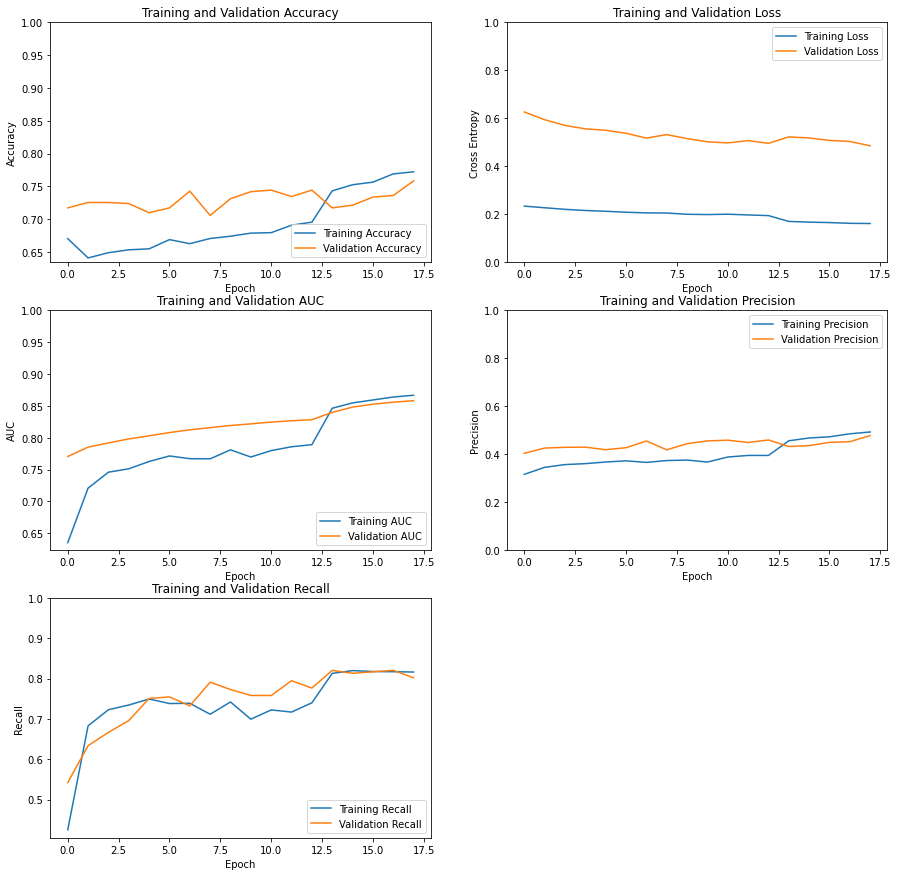

In [98]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)#3,2,1
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

plt.subplot(3, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')


plt.subplot(3, 2, 3)#3,2,1
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')

plt.subplot(3, 2, 4)
plt.plot(precision, label='Training Precision')
plt.plot(val_precision, label='Validation Precision')
plt.legend(loc='upper right')
plt.ylabel('Precision')
plt.ylim([0,1.0])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')


plt.subplot(3, 2, 5)
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')


plt.show()

In [99]:
test_decoder = build_decoder(with_labels=False, target_size=(256, 256))

In [100]:

train_features = build_dataset(
    trainPath, bsize=BATCH_SIZE, repeat=False, 
    shuffle=False, augment=False, cache=False, 
    decode_fn=test_decoder
)

valid_features = build_dataset(
    validPath, bsize=BATCH_SIZE, repeat=False, 
    shuffle=False, augment=False, cache=False, 
    decode_fn=test_decoder
)

In [101]:
train_features, valid_features

<PrefetchDataset shapes: (None, 256, 256, 3), types: tf.float32>

In [102]:
train_predictions_baseline = final_new_model.predict(train_features, batch_size=16)

KeyboardInterrupt: ignored

In [ ]:
valid_predictions_baseline = final_new_model.predict(valid_features, batch_size=16)

In [ ]:
#https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

In [ ]:
plot_roc("Train Baseline", trainLabels, train_predictions_baseline, color=colors[0])
plot_roc("CV Baseline", validLabels, valid_predictions_baseline, color=colors[0], linestyle='..')
plt.legend(loc='lower right')

In [ ]:
final_new_model.load_weights("chexnet_model.h5")

In [ ]:
final_new_model.compile(optimizer=optim,loss='binary_crossentropy',metrics=[METRICS])

In [ ]:
history_epoch_18to23 = final_new_model.fit(
    dtrain, 
    epochs=5, # training for longer results in a better model - but timed out on kernels
    verbose=1,
    callbacks=[checkpoint, lr_reducer,early_stop],
    steps_per_epoch=weighted_steps_per_epoch,
    validation_data=dvalid,
    class_weight=class_weight)

In [ ]:
#from keras import backend as K
#from tf.keras.backend as K